<a href="https://colab.research.google.com/github/extrajp2014/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/module1-OLS-regression/Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 20-80 test-train-split (80% of data for training, and 20% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [66]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


X_train.shape: (17290, 1)
X_test.shape: (4323, 1)
Y_train.shape: (17290,)
Y_test.shape: (4323,)
y_test_predict: [533375.35726623 531471.49406888 529978.26803175 ... 688399.09798955
 530127.59063546 531870.1854208 ]
Slope: 0.7466130185677047
Intercept: 527738.4289760429
MSE: 140770900847.0758
RMSE: 375194.4840307168
R^2: 0.00895108203269801


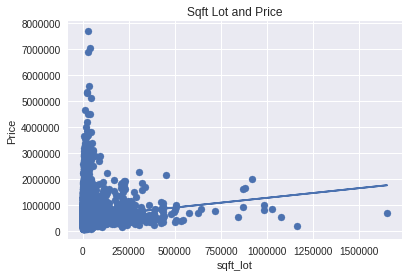

In [75]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Bivariate Regression
################################ 

# Set values for Linear Regression
X = df['sqft_lot'].values[:, np.newaxis]
y = df['price'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2)

# Linear Regression Train Model
model = LinearRegression()
model.fit(X_train, Y_train)

y_test_predict = model.predict(X_test)
MSE = mean_squared_error(Y_test, y_test_predict)
RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
R2 = r2_score(Y_test, y_test_predict)
m_hat = model.coef_[0]
b_hat = model.intercept_

print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape) 
print("Y_train.shape:", Y_train.shape)
print("Y_test.shape:", Y_test.shape) 
print("y_test_predict:", y_test_predict)
print("Slope:", m_hat)
print("Intercept:", b_hat)
print('MSE:',MSE)
print('RMSE:',RMSE)
print('R^2:',R2)

# Graph
plt.scatter(df['sqft_lot'], df['price'])
# best fit line
y_hat = [m_hat*x + b_hat for x in X]
plt.plot(X, y_hat)

# Add text
plt.ylabel("Price")
plt.xlabel("sqft_lot")
plt.title("Sqft Lot and Price")
plt.show()


# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 80-20 train-test-split (80% of data for training, and 20% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

X_train.shape: (17290, 2)
X_test.shape: (4323, 2)
Y_train.shape: (17290, 1)
Y_test.shape: (4323, 1)
y_test_predict: [[337123.03653873]
 [988884.88036104]
 [750824.03284656]
 ...
 [570325.03298419]
 [694571.85220896]
 [375702.7248708 ]]
Slope: [281.61793468  -0.3115609 ]
Intercept: [-40950.35018798]
MSE: 70820040579.78313
RMSE: 266120.34980396205
R^2: 0.49347484668911035


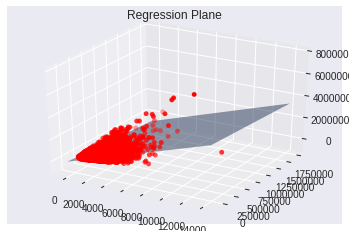

In [85]:
# Two-variable Multiple Regression
################################ 

# Set values for Linear Regression
X = df[['sqft_living','sqft_lot']]
y = df.loc[:, ['price']].values
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2)
# Linear Regression Train Model
model = LinearRegression()
model.fit(X_train, Y_train)

y_test_predict = model.predict(X_test)
MSE = mean_squared_error(Y_test, y_test_predict)
RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
R2 = r2_score(Y_test, y_test_predict)
m_hat = model.coef_[0]
b_hat = model.intercept_

print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape) 
print("Y_train.shape:", Y_train.shape)
print("Y_test.shape:", Y_test.shape) 
print("y_test_predict:", y_test_predict)
print("Slope:", m_hat)
print("Intercept:", b_hat)
print('MSE:',MSE)
print('RMSE:',RMSE)
print('R^2:',R2)

# Graph
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot Points on 3D plot
ax.scatter(df['sqft_living'], df['sqft_lot'], df['price'],c='red')

# Set axes to size of scatter data
x1 = np.array(ax.get_xlim())
y1 = np.array(ax.get_ylim())
xx, yy = np.meshgrid(x1,y1)
beta_i=m_hat
beta_0=b_hat
zz = beta_i[0]*xx + beta_i[1]*yy + beta_0[0]

# Plot Plane
plt3d = plt.gca(projection='3d')

# Add Opacity to Plane 
plt3d.plot_surface(xx, yy, zz,alpha=0.5)
plt.title("Regression Plane")

plt.show()

# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [84]:
# Multiple Regression
################################ 

# Set values for Linear Regression
X = df.drop(['price','date'], axis=1)
y = df.loc[:, ['price']].values
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2)
# Linear Regression Train Model
model = LinearRegression()
model.fit(X_train, Y_train)

y_test_predict = model.predict(X_test)
MSE = mean_squared_error(Y_test, y_test_predict)
RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
R2 = r2_score(Y_test, y_test_predict)
m_hat = model.coef_[0]
b_hat = model.intercept_

print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape) 
print("Y_train.shape:", Y_train.shape)
print("Y_test.shape:", Y_test.shape) 
print("y_test_predict:", y_test_predict)
print("Slope:", m_hat)
print("Intercept:", b_hat)
print('MSE:',MSE)
print('RMSE:',RMSE)
print('R^2:',R2)


X_train.shape: (17290, 19)
X_test.shape: (4323, 19)
Y_train.shape: (17290, 1)
Y_test.shape: (4323, 1)
y_test_predict: [[265283.58913943]
 [677197.38752187]
 [522274.1811028 ]
 ...
 [602803.24358022]
 [429288.01135486]
 [198392.69272468]]
Slope: [-1.05881061e-06 -3.92746543e+04  4.29691440e+04  1.13336165e+02
  1.31637689e-01  8.29709329e+03  6.01796493e+05  5.30826800e+04
  2.52715325e+04  9.83937619e+04  7.01275259e+01  4.32086395e+01
 -2.72944078e+03  1.95283833e+01 -5.70441652e+02  5.96977311e+05
 -1.99432268e+05  1.65890273e+01 -4.19894835e-01]
Intercept: [7874642.84375316]
MSE: 39351884433.624695
RMSE: 198373.09402644477
R^2: 0.6884208982243063


# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- AMES Housing Prediction Kaggle Competition: <https://www.kaggle.com/c/house-prices-advanced-regression-techniques>
- **WRITE A BLOG POST** explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
